In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
by_elec=pd.read_csv("By_elections_data.csv")
by_elec

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,Bihar,Agiaon,PRABHUNATH PRASAD,Janata Dal (United),43334,291,43625,31.66
1,Bihar,Agiaon,SHIV PRAKASH RANJAN,Communist Party of India (Marxist-Leninist) ...,73191,269,73460,53.31
2,Bihar,Agiaon,UPENDRA KUMAR S/O - CHANDESHWAR RAM,Independent,6414,4,6418,4.66
3,Bihar,Agiaon,UPENDRA KUMAR S/O- VAIJNATH RAM,Independent,1380,3,1383,1.00
4,Bihar,Agiaon,PRADEEP KUMAR,Independent,1296,8,1304,0.95
...,...,...,...,...,...,...,...,...
176,West Bengal,Baranagar,SAMAR KRISHNA SINGHA,Socialist Unity Centre Of India (COMMUNIST),408,2,410,0.25
177,West Bengal,Baranagar,PRASENJIT DEY,Independent,224,0,224,0.14
178,West Bengal,Baranagar,SHUBHRANGSHU BHAKTA,Independent,545,0,545,0.34
179,West Bengal,Baranagar,SAJAL KUMAR GHOSH,Independent,427,1,428,0.27


# By elections data Analysis :

#### Removing dupliacte rows if present :

In [4]:
duplicate_rows = by_elec[by_elec.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Basic info of data :

In [5]:
by_elec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         181 non-null    object 
 1   Constituency  181 non-null    object 
 2   Candidate     181 non-null    object 
 3   Party         181 non-null    object 
 4   EVM Votes     181 non-null    int64  
 5   Postal Votes  181 non-null    int64  
 6   Total Votes   181 non-null    int64  
 7   % of Votes    181 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 11.4+ KB


In [6]:
by_elec.describe()

,EVM Votes,Postal Votes,Total Votes,% of Votes
count,181.000000,181.000000,181.000000,181.000000
mean,19708.259669,177.182320,19885.441989,13.812044
std,33920.876810,333.034391,34145.776203,21.203159
min,43.000000,0.000000,43.000000,0.030000
25%,426.000000,1.000000,426.000000,0.300000
50%,1304.000000,10.000000,1307.000000,0.800000
75%,26403.000000,194.000000,26735.000000,30.800000
max,142314.000000,1667.000000,142948.000000,85.960000


In [7]:
#null values checking
by_elec.isnull().sum()

State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
dtype: int64

# Analysis :

#### State wise analysis:

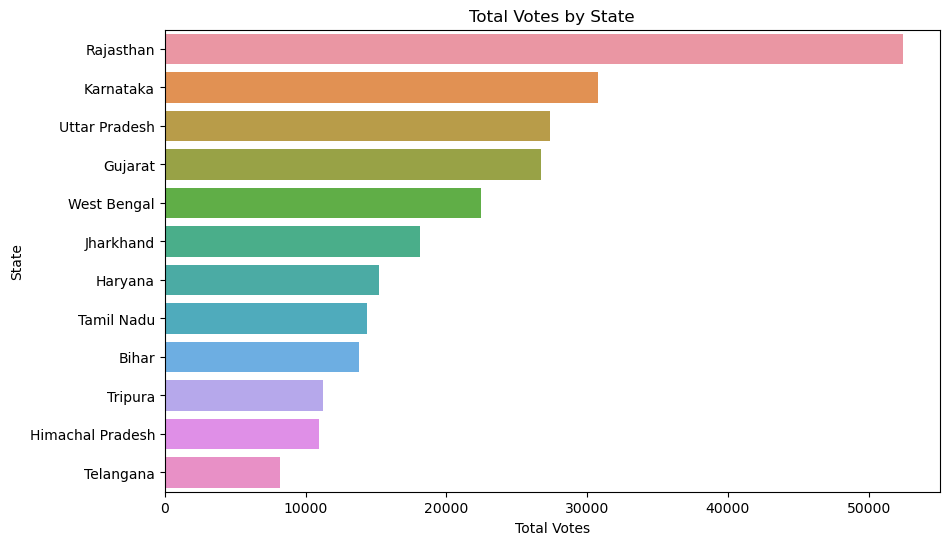

In [11]:
state_votes = by_elec.groupby('State')['Total Votes'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Votes', y='State', data=state_votes)
plt.title('Total Votes by State')
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.show()

#### Higher influence parties :

In [15]:
party_votes = by_elec.groupby('Party')['Total Votes'].mean().sort_values(ascending=False)

print("Top Influencing Parties:")
party_votes.head(10)

Top Influencing Parties:


Party
Bharat Adivasi Party                                          122573.000000
Jharkhand Mukti Morcha                                        109827.000000
All India Trinamool Congress                                   88173.500000
Samajwadi Party                                                86361.333333
Communist Party of India  (Marxist-Leninist)  (Liberation)     73460.000000
Bharatiya Janata Party                                         67852.375000
Indian National Congress                                       48600.000000
Janata Dal  (United)                                           43625.000000
Bharat Rashtra Samithi                                         34462.000000
Bahujan Samaj Party                                            17110.750000
Name: Total Votes, dtype: float64

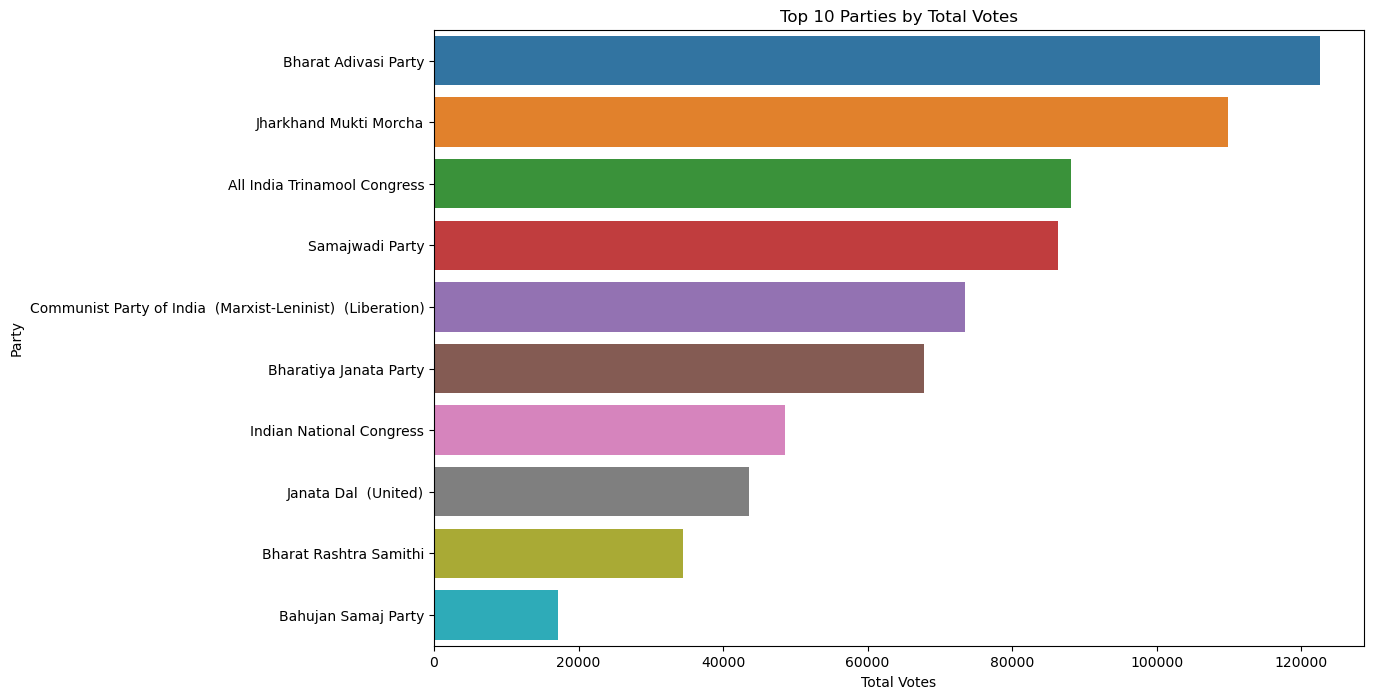

In [12]:
party_votes = by_elec.groupby('Party')['Total Votes'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Votes', y='Party', data=party_votes.head(10))
plt.title('Top 10 Parties by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.show()

####  Percentage of Votes Analysis for each party :

In [25]:
party_votes_percentage = by_elec.groupby('Party')['Total Votes'].sum() / by_elec['Total Votes'].sum() * 100

party_votes_percentage = party_votes_percentage.reset_index()
party_votes_percentage = party_votes_percentage.sort_values(by='Total Votes', ascending=False)

print("Percentage of Votes per Party:")
party_votes_percentage

Percentage of Votes per Party:


,Party,Total Votes
8,Bharatiya Janata Party,45.244154
15,Indian National Congress,24.304962
29,Samajwadi Party,7.198247
3,All India Trinamool Congress,4.899528
6,Bharat Adivasi Party,3.405501
18,Jharkhand Mukti Morcha,3.051373
14,Independent,2.557717
11,Communist Party of India (Marxist-Leninist) ...,2.040972
5,Bahujan Samaj Party,1.901583
22,None of the Above,1.313713


#### Candidate Performance Analysis:

In [19]:
candidate_votes = by_elec.groupby('Candidate')['Total Votes'].sum().sort_values(ascending=False)

print("Top Performing Candidates:")
candidate_votes.head(10)

Top Performing Candidates:


Candidate
O. P. SRIVASTAVA                 142948
ARJUN DEVABHAI MODHWADIA         133163
DHARMENDRASINH VAGHELA (BAPU)    127446
JAIKRISHN PATEL                  122573
RAJA VENUGOPAL NAIK              114886
KALPANA MURMU SOREN              109827
REYAT HOSSAIN SARKAR             107096
ARVIND KUMAR SINGH               105972
DR. C. J. CHAVDA                 100641
NARASIMHA NAYAK                   96566
Name: Total Votes, dtype: int64

#### Each Constituency -Maximum total votes :

In [28]:
top_candidates = by_elec.loc[by_elec.groupby('Constituency')['Total Votes'].idxmax()]

constituency_candidates = top_candidates[['Constituency', 'Candidate', 'Party', 'Total Votes']]
print(constituency_candidates)

           Constituency                      Candidate  \
1                Agiaon            SHIV PRAKASH RANJAN   
101            BAGIDORA                JAIKRISHN PATEL   
65               BARSAR           INDER DUTT LAKHANPAL   
174           Baranagar             SAYANTIKA BANERJEE   
166        Bhagabangola           REYAT HOSSAIN SARKAR   
50          DHARAMSHALA                  SUDHIR SHARMA   
133             Dadraul             ARVIND KUMAR SINGH   
158              Duddhi                    VIJAY SINGH   
70               GAGRET                   RAKESH KALIA   
149            Gainsari             RAKESH KUMAR YADAV   
80               Gandey            KALPANA MURMU SOREN   
40               KARNAL                    NAYAB SINGH   
76             KUTLEHAR           VIVEK SHARMA (VICKU)   
31             Khambhat   CHIRAGKUMAR ARVINDBHAI PATEL   
54       LAHAUL & SPITI                  ANURADHA RANA   
146        Lucknow East               O. P. SRIVASTAVA   
26            

#### Postal votes analysis :

In [30]:
top_postal_candidate = by_elec.loc[by_elec['Postal Votes'].idxmax()]
print("Candidate with the most postal votes:")
print(f"Constituency: {top_postal_candidate['Constituency']}")
print(f"Candidate: {top_postal_candidate['Candidate']}")
print(f"Party: {top_postal_candidate['Party']}")
print(f"Postal Votes: {top_postal_candidate['Postal Votes']}")

party_postal_votes = by_elec.groupby('Party')['Postal Votes'].sum().sort_values(ascending=False)
top_postal_party = party_postal_votes.idxmax()
print("\nParty with the most postal votes:")
print(f"Party: {top_postal_party}")
print(f"Postal Votes: {party_postal_votes[top_postal_party]}")

Candidate with the most postal votes:
Constituency: Vilavancode
Candidate: THARAHAI CUTHBERT
Party: Indian National Congress
Postal Votes: 1667

Party with the most postal votes:
Party: Bharatiya Janata Party
Postal Votes: 13912


#### Evm votes:

In [36]:
max_evm_candidate = by_elec.loc[by_elec['EVM Votes'].idxmax()]

# Displaying the party and candidate with most EVM votes
print("Party and Candidate with Most EVM Votes Overall:")
max_evm_candidate[['Candidate', 'Party', 'EVM Votes']]

Party and Candidate with Most EVM Votes Overall:


Candidate          O. P. SRIVASTAVA
Party        Bharatiya Janata Party
EVM Votes                    142314
Name: 146, dtype: object

#### State wise voting percentage:

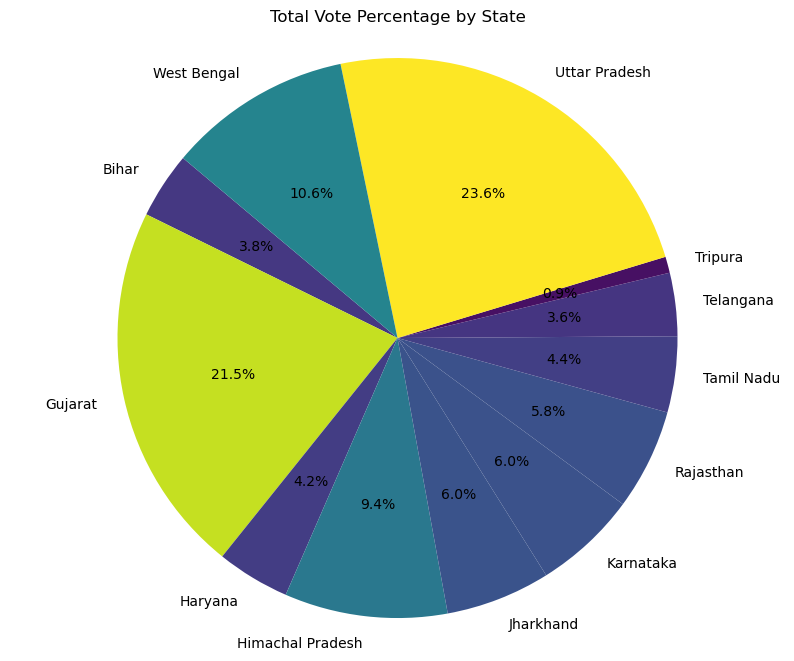

In [42]:
state_votes = by_elec.groupby('State')['Total Votes'].sum().reset_index()

total_votes_sum = state_votes['Total Votes'].sum()
state_votes['% of Total Votes'] = (state_votes['Total Votes'] / total_votes_sum) * 100

plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(state_votes['% of Total Votes'] / state_votes['% of Total Votes'].max()) 
plt.pie(state_votes['% of Total Votes'], labels=state_votes['State'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Vote Percentage by State')
plt.axis('equal')  
plt.show()